# First look

In [1]:
import pandas as pd

taxi_data = pd.read_csv("https://datasciencebocconi.github.io/Data/taxi_tidy.csv")
taxi_data.head()

,Unnamed: 0,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
0,1,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
1,2,7,5,21,146,4,672,1,MN24,1,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17
2,3,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
3,4,2,5,22,148,6,637,1,MN17,1,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33
4,5,17,5,21,141,6,2491,1,MN17,4,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98


The dataset looks to have a tidy organization: each row is an observation, each column is a variable.

Anyway, we can set as index the one that is already in the dataset

In [2]:
taxi_data.rename(columns={'Unnamed: 0': 'index'}, inplace=True)
taxi_data.set_index('index', inplace=True)
taxi_data.head()

,pickup_hour,pickup_month,pickup_week,pickup_doy,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pair
index,,,,,,,,,,,,,,,,,,,
1,18,5,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,MN15-MN19
2,7,5,21,146,4,672,1,MN24,1,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5,MN24-MN17
3,18,5,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,MN21-MN24
4,2,5,22,148,6,637,1,MN17,1,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0,MN17-MN33
5,17,5,21,141,6,2491,1,MN17,4,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5,MN17-QN98


Let's explore deeper!

In [3]:
taxi_data.size

9334548

In [4]:
taxi_data_memory_usage = taxi_data.memory_usage(deep=True).sum() / (1024 ** 2) 

print("Memory usage of taxi_data DataFrame: {:.2f} MB".format(taxi_data_memory_usage))

Memory usage of taxi_data DataFrame: 151.80 MB


In [5]:
taxi_data.shape

(491292, 19)

# Columns exploration

In [6]:
taxi_data.columns

Index(['pickup_hour', 'pickup_month', 'pickup_week', 'pickup_doy',
       'pickup_wday', 'length_time', 'pickup_BoroCode', 'pickup_NTACode',
       'dropoff_BoroCode', 'dropoff_NTACode', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'vendor_id',
       'passenger_count', 'trip_distance', 'fare_amount', 'pair'],
      dtype='object')

We see that pickup_doy could be more significant called as pickup_day, so why do not change it?

In [7]:
taxi_data.rename(columns={'pickup_doy': 'pickup_day'}, inplace=True)

Let's go on. We have to know very deep what these columns represents, so why do not fix that?

In [8]:
col_meaning= {
    "pickup_hour": "Hour of the pick-up",
    "pickup_month": "Month of the pick-up (always May)",
    "pickup_week": "Week of the pick-up",
    "pickup_day": "Day of the year of the pick-up (from 1 to 365)",
    "pickup_wday": "Day of the week of the pick-up (from 1 to 7)",
    "length_time": "Duration of the ride (in seconds)",
    "pickup_BoroCode": "Macro-area of the pick-up",
    "pickup_NTACode": "Micro-area of the pick-up (Neighborhood Tabulation Areas)",
    "dropoff_BoroCode": "Macro-area of the drop-off",
    "dropoff_NTACode": "Micro-area of the drop-off (Neighborhood Tabulation Areas)",
    "pickup_longitude": "Longitude of the pick-up",
    "pickup_latitude": "Latitude of the pick-up",
    "dropoff_longitude": "Longitude of the drop-off",
    "dropoff_latitude": "Latitude of the drop-off",
    "vendor_id": "The TPEP provider that provided the record",
    "passenger_count": "The number of passengers in the vehicle. This is a driver-entered value.",
    "trip_distance": "The elapsed trip distance in miles reported by the taximeter",
    "fare_amount": "The time-and-distance fare calculated by the meter",
    "pair": "Combination of the variables pickup_NTACode and dropoff_NTACode"
}


Ok, now we can see if there is anything strange and give particular attention to the dtypes

In [9]:
taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491292 entries, 1 to 491292
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_hour        491292 non-null  int64  
 1   pickup_month       491292 non-null  int64  
 2   pickup_week        491292 non-null  int64  
 3   pickup_day         491292 non-null  int64  
 4   pickup_wday        491292 non-null  int64  
 5   length_time        491292 non-null  int64  
 6   pickup_BoroCode    491292 non-null  int64  
 7   pickup_NTACode     491292 non-null  object 
 8   dropoff_BoroCode   491292 non-null  int64  
 9   dropoff_NTACode    491292 non-null  object 
 10  pickup_longitude   491292 non-null  float64
 11  pickup_latitude    491292 non-null  float64
 12  dropoff_longitude  491292 non-null  float64
 13  dropoff_latitude   491292 non-null  float64
 14  vendor_id          491292 non-null  int64  
 15  passenger_count    491292 non-null  int64  
 16  trip_di

Let's fix an important classification, numerical and categorical variables

In [10]:
numerical_columns = ['length_time', 'pickup_longitude', 'pickup_latitude',
                         'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
                         'trip_distance', 'fare_amount']

categorical_columns = ['pickup_hour', 'pickup_month', 'pickup_week', 'pickup_day',
                           'pickup_wday', 'pickup_BoroCode', 'pickup_NTACode',
                           'dropoff_BoroCode', 'dropoff_NTACode', 'vendor_id', 'pair']
    

# Looking for missing values

We've already seen with the .info() method that are no missing values, but let's check it again, it is a very important point!

In [11]:
taxi_data.isna().sum()

pickup_hour          0
pickup_month         0
pickup_week          0
pickup_day           0
pickup_wday          0
length_time          0
pickup_BoroCode      0
pickup_NTACode       0
dropoff_BoroCode     0
dropoff_NTACode      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
vendor_id            0
passenger_count      0
trip_distance        0
fare_amount          0
pair                 0
dtype: int64

There are no missing values using this method, but we have to do further analysis!

In [12]:
# Custom missing values
custom_missing_values = ['-', '/', 'NA', 'Not Available', 'Not Applicable', 
                         'Not Recorded', 'Unknown', 'Missing', '0', '999', 
                         '9999', '99999', 'NaN', 'N/A', 'null', 'NULL', 
                         'None', 'none', 'NIL', 'nil']

# Here the numbers are strings!

taxi_data.replace(custom_missing_values, pd.NA, inplace=True)


missing_counts = taxi_data.isna().sum()

print("Occurrences of custom missing values in every column:")
print(missing_counts)


if (missing_counts == 0).all():
    print("\nThere are no missing values in any column.")
else:
    print("\nThere are missing values in one or more columns.")


Occurrences of custom missing values in every column:
pickup_hour          0
pickup_month         0
pickup_week          0
pickup_day           0
pickup_wday          0
length_time          0
pickup_BoroCode      0
pickup_NTACode       0
dropoff_BoroCode     0
dropoff_NTACode      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
vendor_id            0
passenger_count      0
trip_distance        0
fare_amount          0
pair                 0
dtype: int64

There are no missing values in any column.


Ok, there are no missing values! But let's explore if all the data is meaningful

# Are all columns needed?

## pickup_month

As the dataset description says:"Although data for billions of rides across several years are available, we will focus on a subset of data from May 2015", so let's check if the colum pickup_month is useful or not

In [13]:
(taxi_data['pickup_month'] == 5).all()

True

Let's import some useful libraries for data visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

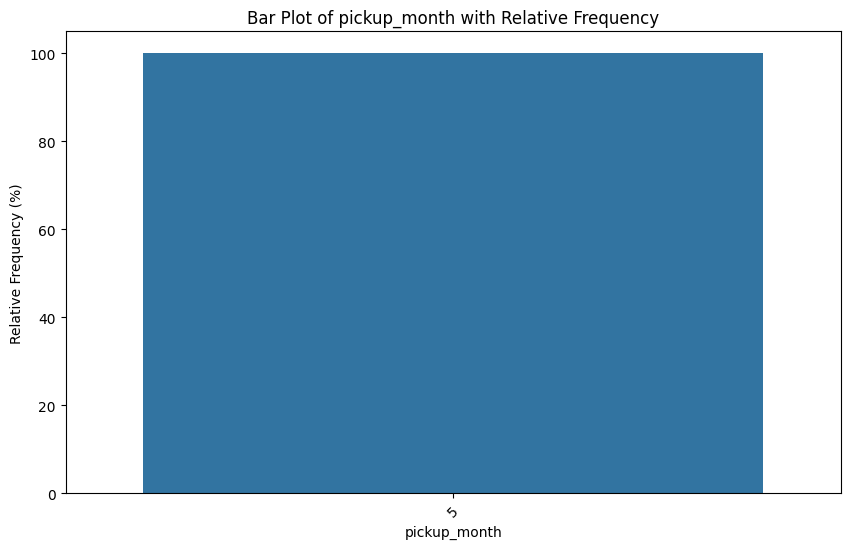

In [15]:
plt.figure(figsize=(10, 6))
# Calculate relative frequency
relative_freq = taxi_data['pickup_month'].value_counts(normalize=True) * 100
sns.barplot(x=relative_freq.index, y=relative_freq.values)
plt.title(f"Bar Plot of pickup_month with Relative Frequency")
plt.xlabel('pickup_month')
plt.ylabel("Relative Frequency (%)")
plt.xticks(rotation=45);                                                      

Ok, the information in this column is redundant and implied

## pair

As we see in the columns description: "pair: Combination of the variables pickup_NTACode and dropoff_NTACode", so let's check it.


In [16]:
(taxi_data['pair'] == taxi_data['pickup_NTACode'] + '-' + taxi_data['dropoff_NTACode']).all()

True

This information can be easily be produced with those two columns!

Let's drop them!

In [17]:
taxi_data.drop(['pair', 'pickup_month'], axis=1, inplace=True)

In [18]:
new_memory_usage = taxi_data.memory_usage(deep=True).sum() / (1024 ** 2)

memory_reduction_percentage = (1 - new_memory_usage / taxi_data_memory_usage) * 100

print("Memory usage of taxi_data DataFrame after dropping columns: {:.2f} MB".format(new_memory_usage))
print("It has reduced by {:.2f}%".format(memory_reduction_percentage))


Memory usage of taxi_data DataFrame after dropping columns: 117.13 MB
It has reduced by 22.84%


# Exploration of numerical columns

In [19]:
taxi_data[numerical_columns].describe()

,length_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount
count,491292.000000,491292.000000,491292.000000,491292.000000,491292.000000,491292.000000,4.912920e+05,491292.000000
mean,985.000853,-73.973938,40.750535,-73.973544,40.751074,1.641301,2.813226e+01,13.450401
std,2694.842046,0.037660,0.027587,0.033461,0.031820,1.293645,1.712510e+04,10.359049
min,0.000000,-74.104080,40.575272,-74.242378,40.502365,0.000000,0.000000e+00,0.010000
25%,434.000000,-73.992378,40.736317,-73.991577,40.734570,1.000000,1.100000e+00,7.000000
50%,716.000000,-73.981934,40.752998,-73.979866,40.753632,1.000000,1.830000e+00,10.000000
75%,1157.000000,-73.967644,40.768681,-73.963333,40.770138,2.000000,3.400000e+00,15.500000
max,86393.000000,-73.728279,40.901421,-73.701439,40.911293,8.000000,1.200000e+07,500.000000


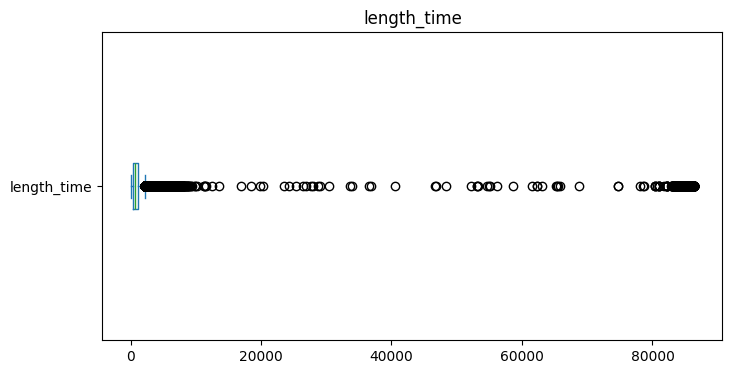

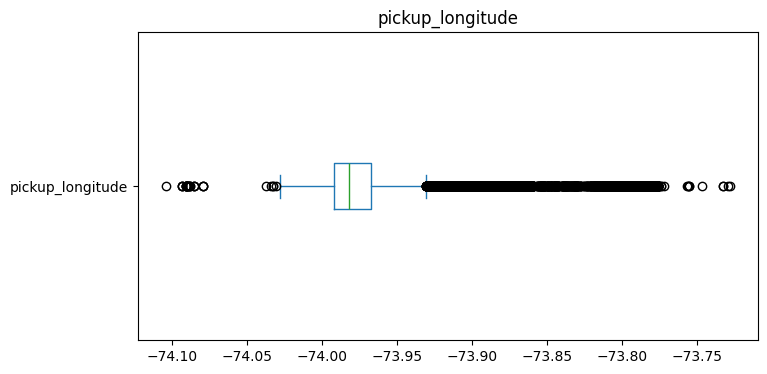

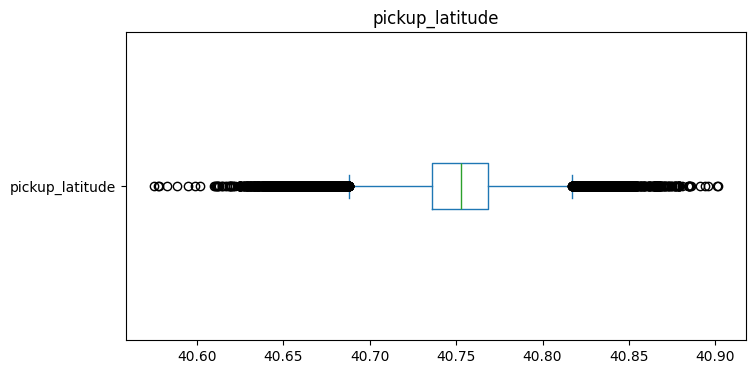

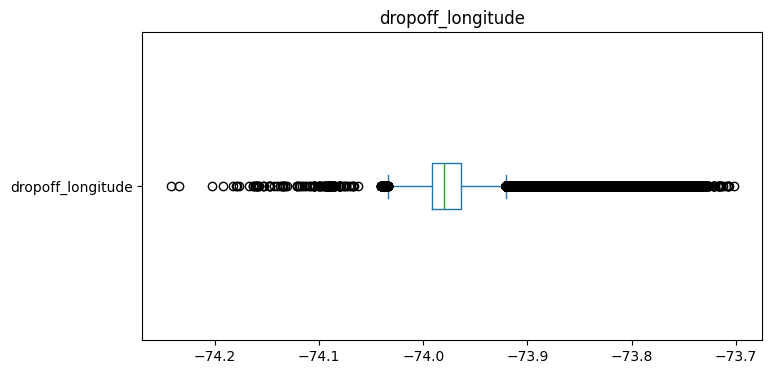

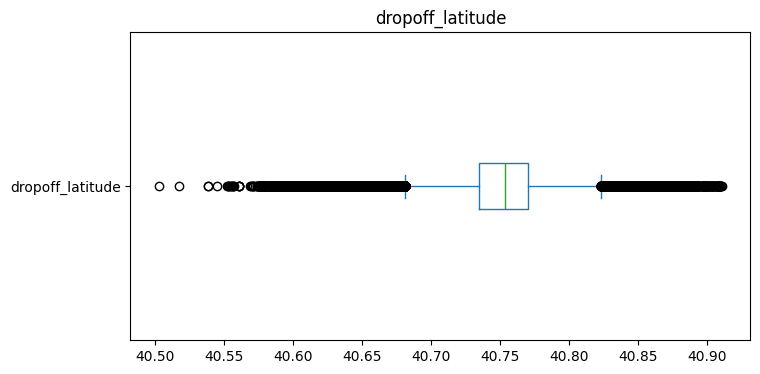

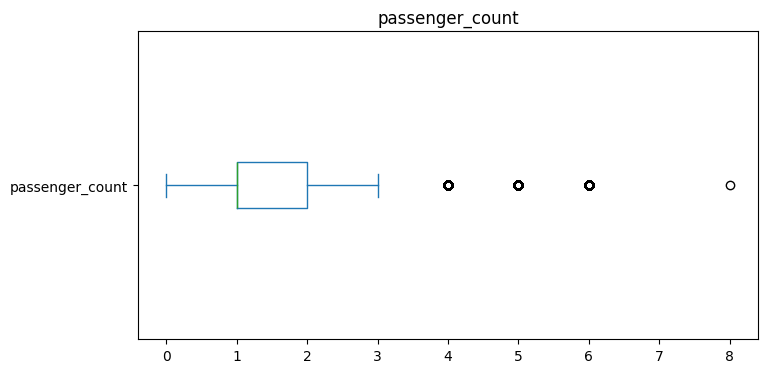

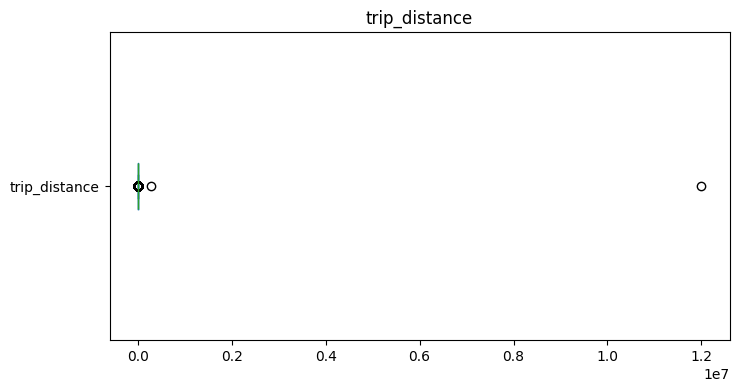

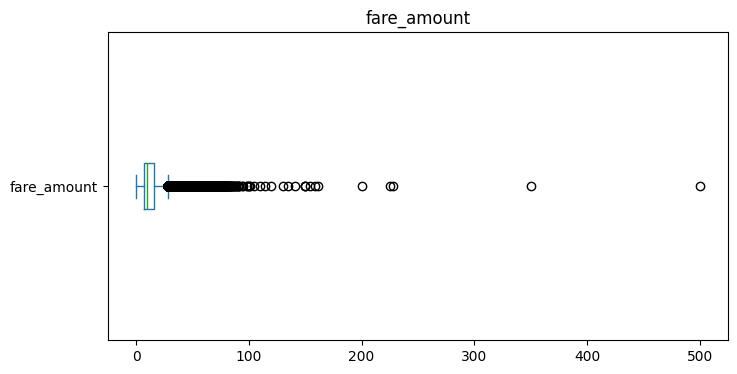

In [20]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    taxi_data[col].plot(kind='box', vert=False)
    plt.title(col)
    plt.show()

## Longitude and latitude

In the box plots the distributions seem quite normal, and nothing strange looks to be in place, but let's go deeper.

We' ve searched on internet to find plausible coordinates for the Neighborhood Tabulation Areas (NTA) and we have found:

Extent
West -74.257159 East -73.699215 North 40.915568 South 40.495992

So the latitude and longitude values should not differ from this


Source: https://nycopendata.socrata.com/api/views/cpf4-rkhq/files/9764f3dc-60d3-48de-8d21-7ac70dad650d?download=true&filename=nynta2010_metadata.pdf

In [21]:
lat_long_mask = (
    (taxi_data['pickup_longitude'] >= -74.257159) & 
    (taxi_data['pickup_longitude'] <= -73.699215) &
    (taxi_data['pickup_latitude'] >= 40.495992) &
    (taxi_data['pickup_latitude'] <= 40.915568) &
    (taxi_data['dropoff_longitude'] >= -74.257159) & 
    (taxi_data['dropoff_longitude'] <= -73.699215) &
    (taxi_data['dropoff_latitude'] >= 40.495992) &
    (taxi_data['dropoff_latitude'] <= 40.915568)
)

if lat_long_mask.all():
    print("The latitude and longitude condition is respected over the entire DataFrame")

The latitude and longitude condition is respected over the entire DataFrame


Ok, the data seems correct!

## Passenger count

In [22]:
taxi_data['passenger_count'].value_counts()

passenger_count
1    351962
2     70118
5     25926
3     19400
6     15427
4      8440
0        18
8         1
Name: count, dtype: int64

The maximum amount of passengers allowed in a yellow taxicab by law is four (4) in a four (4) passenger taxicab or five (5) passengers in a five (5) passenger taxicab, except that an additional passenger must be accepted if such passenger is under the age of seven (7) and is held on the lap of an adult passenger seated in the rear. 

Source: https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page

And because, as has the data description says:"Each observation corresponds to a ride taken in a yellow taxi cab" the maximum number of passengers is 6. Then 8 and 0 are not good.

In [23]:
outliers_passenger = taxi_data[taxi_data['passenger_count'] > 6]

outliers_passenger

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount
index,,,,,,,,,,,,,,,,,
300059,3,21,142,7,5,1,MN23,1,MN23,-74.00798,40.740211,-74.007988,40.740231,2,8,0.0,8.0


In [24]:
passenger_0 = taxi_data[taxi_data['passenger_count'] == 0]

passenger_0

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount
index,,,,,,,,,,,,,,,,,
45399,22,19,132,4,680,1,MN20,1,MN13,-73.974129,40.747021,-74.000969,40.746284,1,0,1.9,10.0
72685,0,20,140,5,335,1,MN17,1,MN23,-73.979805,40.755161,-73.994934,40.734486,1,0,1.6,13.0
125681,19,20,134,6,4,1,MN04,1,MN04,-73.945686,40.824379,-73.945709,40.824390,2,0,0.0,22.0
142064,6,21,144,2,57,4,QN98,4,QN98,-73.862076,40.768791,-73.862244,40.768723,2,0,0.0,40.0
169942,23,20,136,1,23,1,MN22,1,MN22,-73.984497,40.728680,-73.984497,40.728680,2,0,0.0,8.8
196032,2,22,149,7,3,1,MN20,1,MN20,-73.981232,40.742996,-73.981239,40.743103,2,0,0.0,8.0
219716,21,19,132,4,614,1,MN22,1,MN20,-73.982872,40.722824,-73.974037,40.737209,1,0,1.5,8.5
255806,20,20,140,5,3,3,BK76,3,BK76,-73.954796,40.733501,-73.954834,40.733490,2,0,0.0,13.0
271518,12,20,134,6,6,4,QN98,4,QN03,-73.801979,40.664188,-73.801888,40.665359,1,0,0.1,52.0


Where the passenger are 8 the trip distance is 0, it is even more strange. The trip distance is 0 in other of these values and nevertheless is often very small as lenght time.

## Trip distance

As I've found on Quora the longest drive within the five boroughs of New York City would be from the top of the Bronx to the bottom of Staten Island, and take about 90 minutes (although you could save about 20 minutes by cutting through New Jersey.)


Source: https://www.quora.com/What-is-the-longest-distance-you-have-had-to-drive-within-New-York-City-How-long-did-it-take-you#:~:text=How%20long%20did%20it%20take%20you%3F,-All%20related%20(37&text=The%20longest%20drive%20within%20the,by%20cutting%20through%20New%20Jersey.)

So, making a concrete example using google maps and putting as start point: 244 Aspinwall St, Staten Island, NY 10307 and as end point: 231 Broadway, Hastings-On-Hudson, NY 10706; the maximum that it will takes is 1hr 21 min and 71 miles passing by via Garden State Pkwy N (the longest way).

Visualization: https://www.google.com/maps/dir/40.5017534,-74.2477452/40.9888059,-73.8814811/@40.8029303,-74.4118979,10z/data=!3m1!4b1!4m3!4m2!3e0!5i2?entry=ttu

<img src="https://i.imgur.com/9KFG0Pl_d.jpg?maxwidth=520&shape=thumb&fidelity=high" alt="Example Image" width="600" height="400">


So it's not crazy to assume that trip distance should be greater than 0 but less than 100 miles, isn't it?

Moreover, we've found that:

Speed Limits In New York State
Residential Areas: Usually 30 MPH unless otherwise posted. School Zones: Speeds generally drop to 20 MPH during school hours. Highways: Depending on the specific road, maximum limits can range from 55 to 65 MPH. Within NYC: 30 MPH in most cases.

Source: https://ekjlaw.com/speed-limits-in-new-york-how-much-over-the-speed-limit-is-too-much/#:~:text=Speed%20Limits%20In%20New%20York%20State&text=Residential%20Areas%3A%20Usually%2030%20MPH,30%20MPH%20in%20most%20cases.

So we can assume that is very improbable an average speed of over 90 mph.

And we can make an idea of what should be a fare amount!

As of September 4, 2012, fares begin at $2.50 ($3.00 between 8:00 p.m. and 6:00 am, and $3.50 during the peak weekday hours of 4:00–8:00 p.m.) and increase based on the distance traveled and time spent in slow traffic (50 cents for each one-fifth of a mile or each 50 seconds stopped or traveling under 12 miles an hour). An additional 50¢ tax is added to all trips within New York City. For trips to Nassau and Westchester counties, fare is the metered rate from the point of origin to the city limit, then twice the metered rate from the city limit to the destination. All trips between Manhattan and John F. Kennedy International Airport are charged a flat rate of $52. All trips to Newark Airport are charged the metered rate plus $17.50. The passenger also has to pay for any portion of the trip where the cab is driven on a toll road. The taxi must have an E-ZPass tag, and passengers pay the discounted E-ZPass toll rates.

Fares were increased at the end of 2022. Under the new plan, fares begin at $3.00. An additional surcharge of $2.50 applies during weekday rush hours, and a surcharge of $1 applies during overnight hours. In addition, all trips between Manhattan and JFK Airport are charged a flat rate of $70, and all trips to or from LaGuardia Airport will be charged the metered rate plus $5.

Source: https://en.wikipedia.org/wiki/Taxis_of_New_York_City


In [25]:
# Let's make a function to estimate (just to make an idea, it's not correct) the fare amount
def estimate_fare(row):
    base_fare = 3.50 if (row['pickup_hour'] >= 16 and row['pickup_hour'] < 20) else 3.00 if (row['pickup_hour'] >= 20 or row['pickup_hour'] < 6) else 2.50
    distance_fare = 0.50 * (row['trip_distance'] / 0.2)  # 50 cents for each one-fifth of a mile
    time_fare = 0.50 * (row['length_time'] / 50)  # 50 cents for each 50 seconds stopped or traveling under 12 miles an hour
    total_fare = base_fare + distance_fare + time_fare + 0.50  # Additional 50 cents tax for trips within New York City
    return total_fare



In [26]:
taxi_data_modified = taxi_data.copy()

# Calculate fare amount using the estimate_fare function and round to 2 decimal points
taxi_data_modified['fare_amount_calculated'] = taxi_data_modified.apply(estimate_fare, axis=1).round(2)

# Calculate duration in hours and round to 2 decimal points
taxi_data_modified['duration_hours'] = (taxi_data_modified['length_time'] / 3600).round(2)

# Calculate average speed in miles per hour and round to 2 decimal points
taxi_data_modified['mph'] = (taxi_data_modified['trip_distance'] / taxi_data_modified['duration_hours']).round(2)

# Calculate fare per mile and round to 2 decimal points
taxi_data_modified['fare_per_mile'] = (taxi_data_modified['fare_amount'] / taxi_data_modified['trip_distance']).round(2)

taxi_data_modified.head()

# It can take a while (20-30 sec)


,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
1,18,19,132,4,520,1,MN15,1,MN19,-73.983009,...,-73.967972,40.760677,1,1,0.90,7.0,11.45,0.14,6.43,7.78
2,7,21,146,4,672,1,MN24,1,MN17,-74.009789,...,-73.983223,40.760330,1,1,3.70,12.5,18.97,0.19,19.47,3.38
3,18,19,127,6,824,1,MN21,1,MN24,-73.989510,...,-73.997185,40.717976,1,1,1.40,10.0,15.74,0.23,6.09,7.14
4,2,22,148,6,637,1,MN17,1,MN33,-73.978989,...,-73.951187,40.789021,1,1,3.40,12.0,18.37,0.18,18.89,3.53
5,17,21,141,6,2491,1,MN17,4,QN98,-73.985313,...,-73.865250,40.770699,2,1,11.74,37.5,58.26,0.69,17.01,3.19


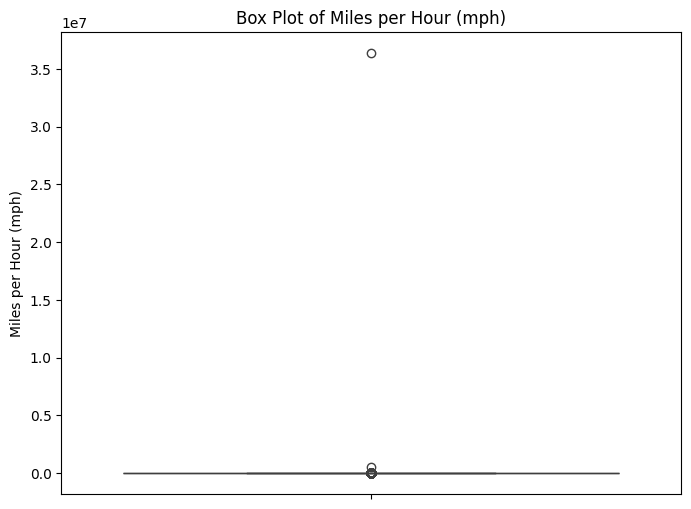

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=taxi_data_modified['mph'])
plt.title('Box Plot of Miles per Hour (mph)')
plt.ylabel('Miles per Hour (mph)')
plt.show()

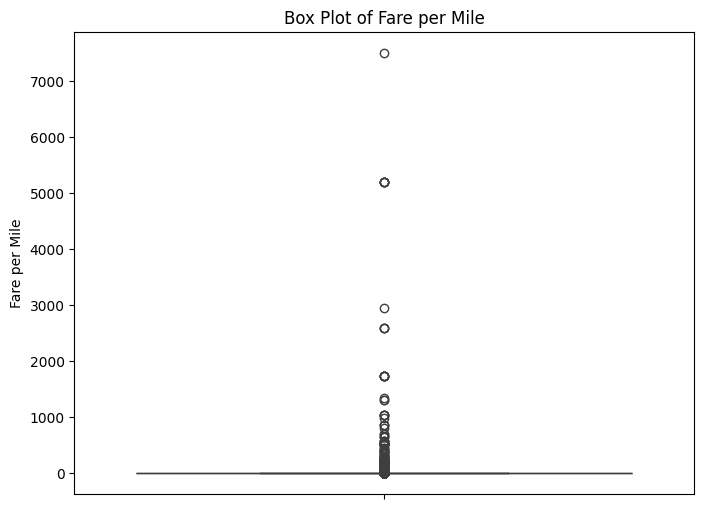

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=taxi_data_modified['fare_per_mile'])
plt.title('Box Plot of Fare per Mile')
plt.ylabel('Fare per Mile')
plt.show()

Let's find those outliers!

In [29]:
outliers_distance = taxi_data_modified[(taxi_data_modified.trip_distance >= 100)]

outliers_distance

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
28050,1,19,129,1,1809,1,MN24,1,MN32,-74.004509,...,-73.948387,40.782665,1,2,284000.0,27.5,710021.59,0.50,568000.00,0.00
360114,8,19,127,6,827,1,MN15,1,MN15,-74.000748,...,-73.992355,40.755054,1,1,601.0,9.5,1513.77,0.23,2613.04,0.02
369504,17,20,139,4,3987,4,QN98,1,MN23,-73.783264,...,-74.004875,40.729607,1,2,188.8,52.0,515.87,1.11,170.09,0.28
378486,4,22,149,7,1199,1,MN17,3,BK75,-73.990784,...,-73.959198,40.688946,1,1,12000003.9,20.5,30000025.24,0.33,36363648.18,0.00


Those values are completely no sense, the third one looking at mph is no sense.

Let'see how the trip distance distribution  is, without those 4 outliers

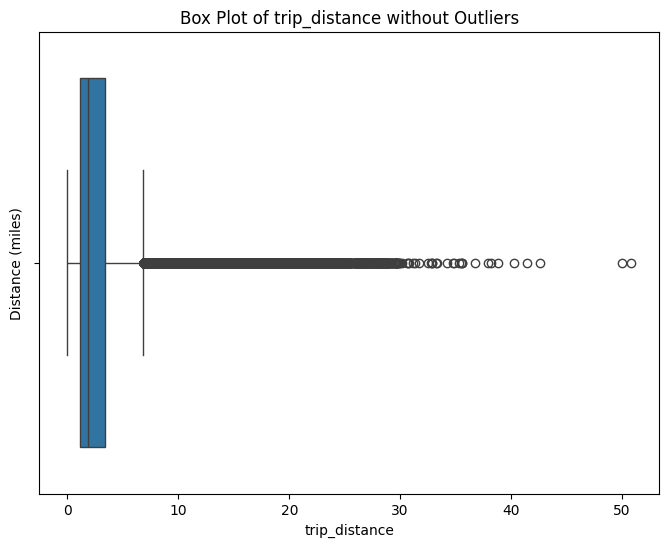

In [30]:
trip_distance_no_outliers = taxi_data[taxi_data['trip_distance'] <= 100]

plt.figure(figsize=(8, 6))  
sns.boxplot(x=trip_distance_no_outliers['trip_distance'])
plt.title('Box Plot of trip_distance without Outliers')
plt.xlabel('trip_distance')
plt.ylabel('Distance (miles)')
plt.show()

Let's investigate more those two data points at the extreme right

In [31]:
outliers_distance_2 = taxi_data_modified[(taxi_data_modified.trip_distance >= 50)]

outliers_distance_2[outliers_distance_2.trip_distance <= 100]

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
94053,18,21,142,7,602,1,MN13,1,MN17,-73.993378,...,-73.988358,40.745796,1,2,50.00,5.0,135.02,0.17,294.12,0.10
359022,12,19,129,1,6453,1,MN17,4,QN98,-73.991798,...,-73.780907,40.644791,2,2,50.82,154.0,194.58,1.79,28.39,3.03


The first one looking at mph is not making any sense, the second seems good looking at mph (so lenght time) and fare amount

In [32]:
outliers_distance_2 = outliers_distance_2.loc[outliers_distance_2.index != 359022]

outliers_distance_2

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
28050,1,19,129,1,1809,1,MN24,1,MN32,-74.004509,...,-73.948387,40.782665,1,2,284000.0,27.5,710021.59,0.50,568000.00,0.00
94053,18,21,142,7,602,1,MN13,1,MN17,-73.993378,...,-73.988358,40.745796,1,2,50.0,5.0,135.02,0.17,294.12,0.10
360114,8,19,127,6,827,1,MN15,1,MN15,-74.000748,...,-73.992355,40.755054,1,1,601.0,9.5,1513.77,0.23,2613.04,0.02
369504,17,20,139,4,3987,4,QN98,1,MN23,-73.783264,...,-74.004875,40.729607,1,2,188.8,52.0,515.87,1.11,170.09,0.28
378486,4,22,149,7,1199,1,MN17,3,BK75,-73.990784,...,-73.959198,40.688946,1,1,12000003.9,20.5,30000025.24,0.33,36363648.18,0.00


Anyway, the trip distance should be greater than 0!

In [33]:
distance_0 = taxi_data_modified[taxi_data_modified.trip_distance == 0]

distance_0

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
234,22,19,127,6,146,4,QN72,4,QN72,-73.911804,...,-73.911804,40.783081,1,1,0.0,38.8,4.96,0.04,0.0,inf
1689,21,19,129,1,3834,4,QN98,1,MN14,-73.790512,...,-73.981155,40.776756,1,1,0.0,52.0,41.84,1.06,0.0,inf
2967,15,19,128,7,3,1,MN23,1,MN23,-73.991661,...,-73.991653,40.730076,1,1,0.0,2.5,3.03,0.00,NaN,inf
3237,23,21,147,5,48,1,MN36,1,MN36,-73.942055,...,-73.942062,40.835388,2,1,0.0,52.0,3.98,0.01,0.0,inf
3620,10,18,126,5,788,1,MN17,1,MN13,-73.975471,...,-73.985603,40.741329,2,1,0.0,9.0,10.88,0.22,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485549,15,19,130,2,7,1,MN13,1,MN13,-74.003227,...,-74.003227,40.756222,2,1,0.0,15.0,3.07,0.00,NaN,inf
488994,6,20,140,5,713,1,MN22,1,MN22,-73.991402,...,-73.991402,40.723927,2,2,0.0,24.0,10.13,0.20,0.0,inf
489183,23,20,134,6,3,1,MN32,1,MN32,-73.946060,...,-73.946060,40.782200,2,1,0.0,15.3,3.53,0.00,NaN,inf


For some of these rows, it can be that the ride was really short or that the cab was only waiting, in other it may be an issue

In [34]:
distance_0[distance_0['length_time'] >= 900]# More than 15 minutes

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
1689,21,19,129,1,3834,4,QN98,1,MN14,-73.790512,...,-73.981155,40.776756,1,1,0.0,52.0,41.84,1.06,0.0,inf
17997,17,18,124,3,1036,1,MN20,1,MN17,-73.975014,...,-73.991013,40.755501,1,1,0.0,11.0,14.36,0.29,0.0,inf
19008,23,19,128,7,2266,1,MN20,3,BK38,-73.978722,...,-73.991554,40.687931,2,1,0.0,20.0,26.16,0.63,0.0,inf
19935,23,19,132,4,1115,1,MN27,1,MN17,-73.988091,...,-73.982834,40.756012,1,4,0.0,14.0,14.65,0.31,0.0,inf
25897,10,21,147,5,1001,1,MN19,1,MN14,-73.966927,...,-73.986069,40.775654,1,1,0.0,10.5,13.01,0.28,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452034,8,21,142,7,1990,1,MN40,4,QN98,-73.959549,...,-73.782898,40.643967,1,4,0.0,52.0,22.90,0.55,0.0,inf
456356,21,21,145,3,1777,1,MN17,3,BK38,-73.983566,...,-73.989700,40.701706,2,1,0.0,17.0,21.27,0.49,0.0,inf
457306,17,18,126,5,1061,1,MN20,1,MN24,-73.977966,...,-74.006218,40.723209,1,1,0.0,14.0,14.61,0.29,0.0,inf


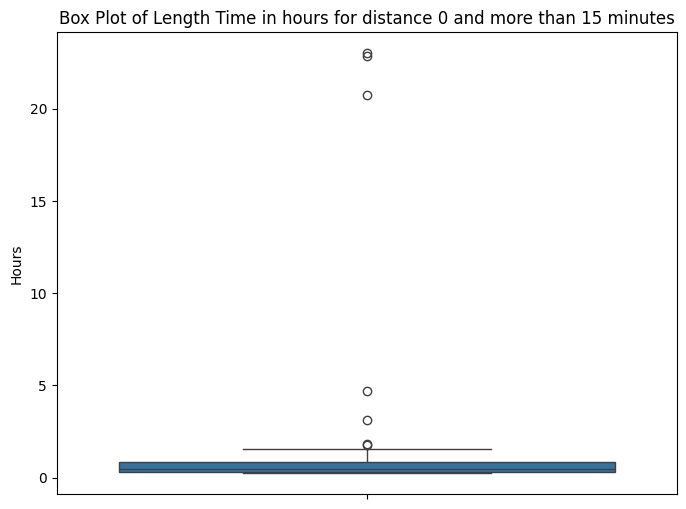

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=distance_0[distance_0['length_time'] >= 900]['duration_hours'])
plt.title('Box Plot of Length Time in hours for distance 0 and more than 15 minutes')
plt.ylabel('Hours')
plt.show()

In [36]:
distance_0[distance_0['length_time'] >= 1800]  # More than 30 minutes

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
1689,21,19,129,1,3834,4,QN98,1,MN14,-73.790512,...,-73.981155,40.776756,1,1,0.0,52.0,41.84,1.06,0.0,inf
19008,23,19,128,7,2266,1,MN20,3,BK38,-73.978722,...,-73.991554,40.687931,2,1,0.0,20.0,26.16,0.63,0.0,inf
28369,12,20,137,2,16979,4,QN98,4,QN98,-73.781937,...,-73.790428,40.643871,2,1,0.0,59.0,172.79,4.72,0.0,inf
30794,14,22,151,2,1905,1,MN19,4,QN98,-73.972099,...,-73.776405,40.645458,2,2,0.0,52.0,22.05,0.53,0.0,inf
36658,20,20,136,1,2578,4,QN98,1,MN12,-73.776840,...,-73.977303,40.779377,1,1,0.0,52.0,29.28,0.72,0.0,inf
36772,21,19,133,5,3061,4,QN98,1,MN15,-73.788406,...,-73.988052,40.763077,2,3,0.0,52.0,34.11,0.85,0.0,inf
64044,18,19,133,5,3637,4,QN98,1,MN12,-73.776825,...,-73.980118,40.785656,2,3,0.0,52.0,40.37,1.01,0.0,inf
65369,19,22,152,3,82809,4,QN98,4,QN98,-73.789650,...,-73.789650,40.642895,2,1,0.0,52.0,832.09,23.00,0.0,inf
126231,14,19,131,3,1813,1,MN25,1,MN20,-74.013687,...,-73.981972,40.751820,2,1,0.0,17.5,21.13,0.50,0.0,inf


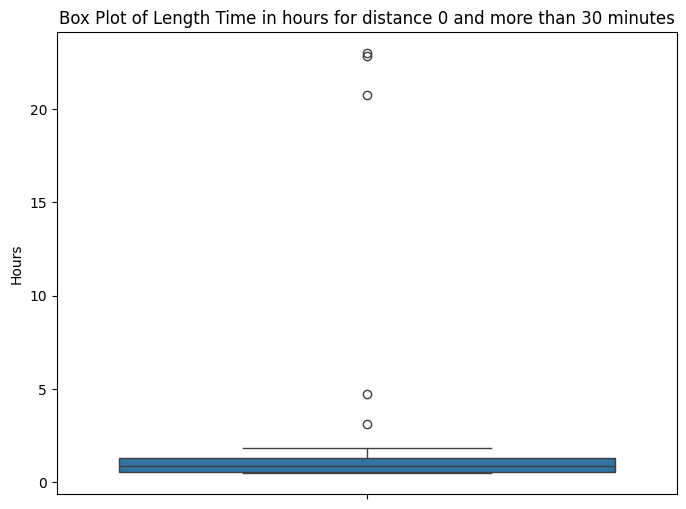

In [37]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=distance_0[distance_0['length_time'] >= 1800]['duration_hours'])
plt.title('Box Plot of Length Time in hours for distance 0 and more than 30 minutes')
plt.ylabel('Hours')
plt.show()

In [38]:
distance_0[distance_0['duration_hours'] >= 1]  

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
1689,21,19,129,1,3834,4,QN98,1,MN14,-73.790512,...,-73.981155,40.776756,1,1,0.0,52.0,41.84,1.06,0.0,inf
28369,12,20,137,2,16979,4,QN98,4,QN98,-73.781937,...,-73.790428,40.643871,2,1,0.0,59.0,172.79,4.72,0.0,inf
64044,18,19,133,5,3637,4,QN98,1,MN12,-73.776825,...,-73.980118,40.785656,2,3,0.0,52.0,40.37,1.01,0.0,inf
65369,19,22,152,3,82809,4,QN98,4,QN98,-73.789650,...,-73.789650,40.642895,2,1,0.0,52.0,832.09,23.00,0.0,inf
134876,19,20,134,6,4139,4,QN98,1,MN21,-73.781914,...,-73.987061,40.733337,2,3,0.0,52.0,45.39,1.15,0.0,inf
180012,18,20,140,5,6422,1,MN25,4,QN98,-74.009117,...,-73.783379,40.643730,2,1,0.0,88.0,68.22,1.78,0.0,inf
219478,14,21,146,4,3921,1,MN17,4,QN98,-73.989311,...,-73.872383,40.774490,2,2,0.0,2.5,42.21,1.09,0.0,inf
261507,0,20,135,7,5701,1,MN15,1,MN24,-73.983421,...,-74.004005,40.720894,2,2,0.0,59.0,60.51,1.58,0.0,inf
301005,0,21,146,4,82256,1,MN15,1,MN15,-73.985092,...,-73.985092,40.766220,2,2,0.0,52.0,826.06,22.85,0.0,inf


Ok, but if the pickupNTA and dropoffNTA are different, the trip distance can't be 0!

In [39]:
distance_0_different_NTA = distance_0[distance_0['pickup_NTACode'] != distance_0['dropoff_NTACode']]

distance_0_different_NTA

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
1689,21,19,129,1,3834,4,QN98,1,MN14,-73.790512,...,-73.981155,40.776756,1,1,0.0,52.0,41.84,1.06,0.0,inf
3620,10,18,126,5,788,1,MN17,1,MN13,-73.975471,...,-73.985603,40.741329,2,1,0.0,9.0,10.88,0.22,0.0,inf
4570,21,20,135,7,511,1,MN17,1,MN24,-73.991524,...,-74.007195,40.727242,2,1,0.0,6.5,8.61,0.14,0.0,inf
4676,15,19,130,2,684,1,MN31,1,MN19,-73.956772,...,-73.972000,40.745579,2,1,0.0,8.0,9.84,0.19,0.0,inf
13222,21,19,131,3,485,1,MN22,1,MN27,-73.985184,...,-73.987244,40.722385,1,2,0.0,6.5,8.35,0.13,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472248,21,20,139,4,421,1,MN13,1,MN21,-74.004639,...,-73.986412,40.740082,2,5,0.0,5.5,7.71,0.12,0.0,inf
479499,20,20,134,6,693,1,MN24,1,MN17,-74.002106,...,-73.985641,40.747562,1,2,0.0,9.5,10.43,0.19,0.0,inf
480134,7,21,146,4,768,1,MN31,1,MN19,-73.956039,...,-73.975433,40.752121,2,1,0.0,8.5,10.68,0.21,0.0,inf


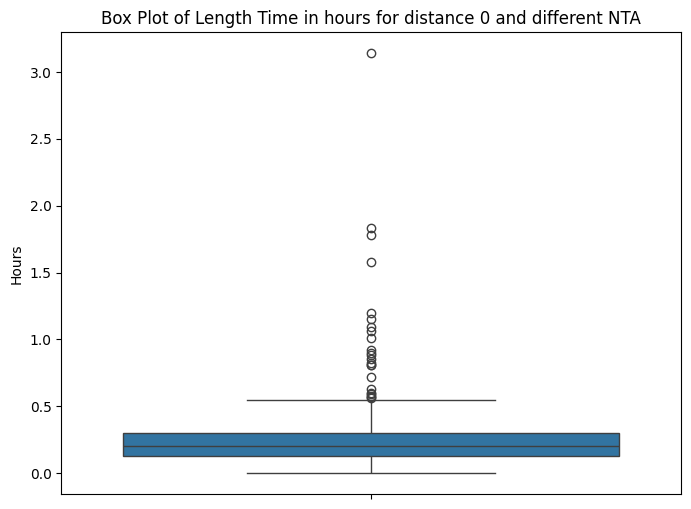

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=distance_0_different_NTA['duration_hours'])
plt.title('Box Plot of Length Time in hours for distance 0 and different NTA')
plt.ylabel('Hours')
plt.show()

In [41]:
taxi_data_modified[taxi_data_modified.trip_distance < 0]

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,


## Length time

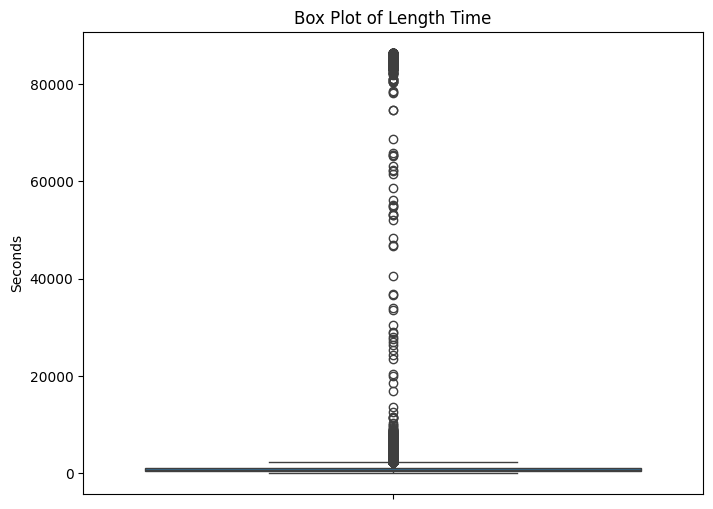

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=taxi_data['length_time'])
plt.title('Box Plot of Length Time')
plt.ylabel('Seconds')
plt.show()

As it is, is not very readable

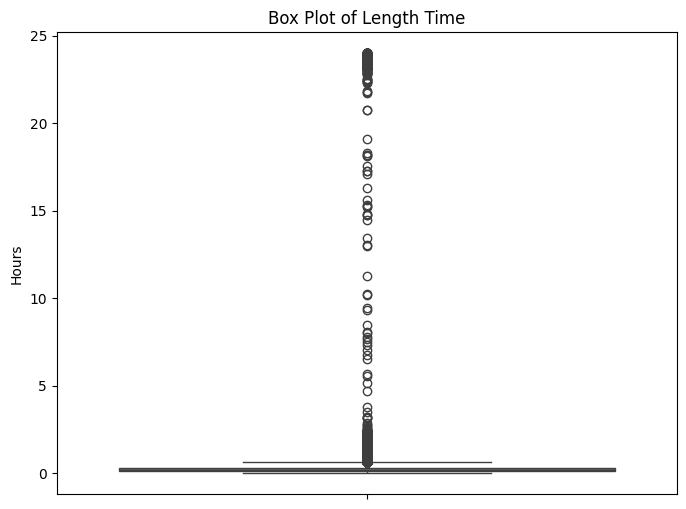

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=taxi_data_modified['duration_hours'])
plt.title('Box Plot of Length Time')
plt.ylabel('Hours')
plt.show()

It's quite crazy to have more than or a 5 hours ride, isn't it?

In [44]:
outliers_time = taxi_data_modified[taxi_data_modified.duration_hours >= 5]

outliers_time

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
588,17,20,138,3,85670,1,MN32,1,MN31,-73.954872,...,-73.959999,40.766472,2,6,0.55,6.5,862.08,23.80,0.02,11.82
848,21,18,126,5,86328,1,MN13,1,MN22,-74.002907,...,-73.989182,40.732239,2,1,1.13,6.5,869.60,23.98,0.05,5.75
1153,13,21,144,2,86292,1,MN14,1,MN09,-73.975998,...,-73.968689,40.803509,2,4,2.41,11.0,871.94,23.97,0.10,4.56
4049,16,20,138,3,86062,1,MN24,1,MN21,-74.011452,...,-73.985100,40.739689,2,2,4.48,22.0,875.82,23.91,0.19,4.91
4950,20,20,139,4,85667,1,MN17,1,MN23,-73.971741,...,-73.997398,40.733467,2,1,2.70,12.0,866.92,23.80,0.11,4.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486299,18,18,125,4,85917,1,MN21,1,MN31,-73.985451,...,-73.959023,40.763779,2,5,2.47,14.5,869.34,23.87,0.10,5.87
486547,17,20,136,1,24260,1,MN22,1,MN23,-73.984955,...,-73.996468,40.725475,2,2,0.75,5.5,248.48,6.74,0.11,7.33
488455,5,21,146,4,65369,1,MN09,1,MN12,-73.964401,...,-73.973801,40.792042,2,1,1.19,6.0,660.17,18.16,0.07,5.04


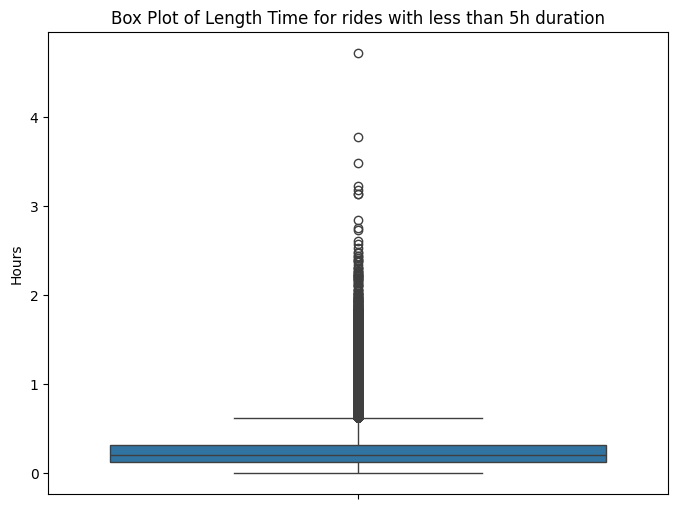

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=taxi_data_modified[taxi_data_modified.duration_hours <= 5]['duration_hours'])
plt.title('Box Plot of Length Time for rides with less than 5h duration')
plt.ylabel('Hours')
plt.show()

Let's investigate that extreme data point

In [46]:
outliers_time_2 = taxi_data_modified[taxi_data_modified.duration_hours >= 4]

outliers_time_2[outliers_time_2.duration_hours < 5]

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
28369,12,20,137,2,16979,4,QN98,4,QN98,-73.781937,...,-73.790428,40.643871,2,1,0.0,59.0,172.79,4.72,0.0,inf


Trip distance 0 and duration hour of almost 5 hours is not so reasonable

In [47]:
time_0 = taxi_data_modified[taxi_data_modified.length_time == 0]

time_0

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
67426,0,20,140,5,0,4,QN98,1,MN15,-73.781052,...,-73.996933,40.761620,2,1,18.17,52.0,48.92,0.0,inf,2.86
133171,0,22,150,1,0,1,MN23,3,BK61,-73.999733,...,-73.942871,40.677292,2,1,7.63,30.0,22.58,0.0,inf,3.93
133283,0,19,127,6,0,1,MN17,1,MN01,-73.994598,...,-73.921638,40.866402,2,1,10.17,52.5,28.92,0.0,inf,5.16
195374,23,20,140,5,0,4,QN98,1,MN20,-73.781830,...,-73.976044,40.744888,2,2,16.61,52.0,45.02,0.0,inf,3.13
224233,23,19,130,2,0,1,MN40,1,MN20,-73.962402,...,-73.980606,40.739452,2,1,9.00,26.5,26.00,0.0,inf,2.94
306686,0,19,128,7,0,4,QN68,4,QN70,-73.937325,...,-73.936760,40.764584,2,1,0.00,2.5,3.50,0.0,NaN,inf
327738,0,20,138,3,0,3,BK38,1,MN17,-73.990829,...,-73.983177,40.744690,2,2,7.21,28.0,21.52,0.0,inf,3.88
409414,0,21,147,5,0,4,QN98,1,MN04,-73.871201,...,-73.952881,40.824696,2,5,8.28,27.0,24.20,0.0,inf,3.26
411313,0,21,147,5,0,1,MN17,4,QN17,-73.987450,...,-73.849152,40.723583,2,1,8.19,31.0,23.98,0.0,inf,3.79


When trip_distance is > 0 having lenght time = 0 is not making so much sense, while the entry with both trip distance and lenght time equal to 0 can be more reasonable, even though the different NTA for pickup and dropoff enlight a problem with trip distance 0, but we have already talked about this.

In [48]:
time_0 = time_0[time_0.trip_distance > 0]

time_0

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
67426,0,20,140,5,0,4,QN98,1,MN15,-73.781052,...,-73.996933,40.761620,2,1,18.17,52.0,48.92,0.0,inf,2.86
133171,0,22,150,1,0,1,MN23,3,BK61,-73.999733,...,-73.942871,40.677292,2,1,7.63,30.0,22.58,0.0,inf,3.93
133283,0,19,127,6,0,1,MN17,1,MN01,-73.994598,...,-73.921638,40.866402,2,1,10.17,52.5,28.92,0.0,inf,5.16
195374,23,20,140,5,0,4,QN98,1,MN20,-73.781830,...,-73.976044,40.744888,2,2,16.61,52.0,45.02,0.0,inf,3.13
224233,23,19,130,2,0,1,MN40,1,MN20,-73.962402,...,-73.980606,40.739452,2,1,9.00,26.5,26.00,0.0,inf,2.94
327738,0,20,138,3,0,3,BK38,1,MN17,-73.990829,...,-73.983177,40.744690,2,2,7.21,28.0,21.52,0.0,inf,3.88
409414,0,21,147,5,0,4,QN98,1,MN04,-73.871201,...,-73.952881,40.824696,2,5,8.28,27.0,24.20,0.0,inf,3.26
411313,0,21,147,5,0,1,MN17,4,QN17,-73.987450,...,-73.849152,40.723583,2,1,8.19,31.0,23.98,0.0,inf,3.79
485879,7,18,124,3,0,4,QN98,3,BK90,-73.788841,...,-73.940361,40.715801,2,1,15.49,51.0,41.72,0.0,inf,3.29


In [49]:
taxi_data_modified[taxi_data_modified.length_time < 0]

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,


## Mph

Let's make a double check using mph (trip distance in miles / lenght time in hours)

As we've seen is very improbable (and severly illegal) an average speed of over 90 but let's stay even larger and take 100 mph as threshold.

There are many values with mph inf or very big values so we cannot visualize directly this.

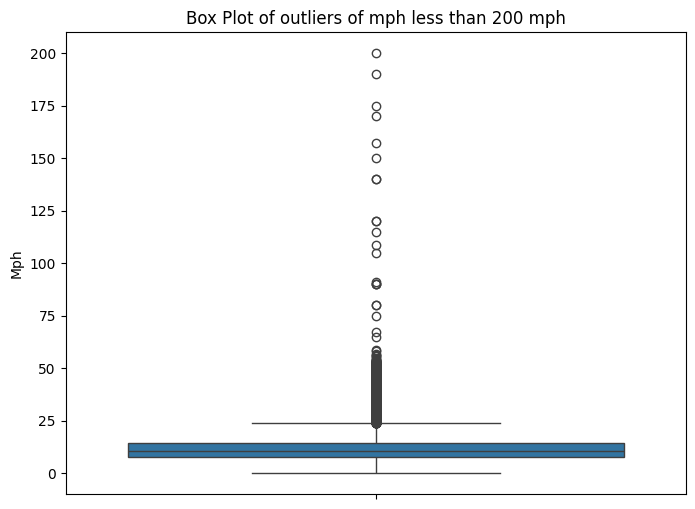

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=taxi_data_modified[taxi_data_modified.mph <= 200]['mph']) # We do not think cabs use a Ferrari
plt.title('Box Plot of outliers of mph less than 200 mph')
plt.ylabel('Mph')
plt.show()

In [51]:
outliers_mph = taxi_data_modified[taxi_data_modified.mph >= 100]

outliers_mph

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
3708,15,20,140,5,20,4,QN98,4,QN98,-73.782578,...,-73.782578,40.644093,1,1,1.20,52.0,6.20,0.01,120.0,43.33
7687,21,20,138,3,20,4,QN98,4,QN98,-73.790321,...,-73.790321,40.643642,1,1,1.40,80.0,7.20,0.01,140.0,57.14
8070,18,20,137,2,16,1,MN31,1,MN31,-73.947899,...,-73.948799,40.769821,2,1,0.07,20.0,4.34,0.00,inf,285.71
11390,14,22,150,1,7,1,MN23,1,MN23,-74.008865,...,-74.008850,40.730782,1,1,1.40,2.5,6.57,0.00,inf,1.79
13145,4,22,149,7,21,4,QN98,4,QN98,-73.790070,...,-73.790070,40.646900,1,2,15.20,43.3,41.71,0.01,1520.0,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481247,19,18,123,2,2,1,MN14,1,MN14,-73.982964,...,-73.982964,40.776909,1,1,2.00,10.5,9.02,0.00,inf,5.25
482002,16,22,152,3,4,1,MN13,1,MN13,-74.005722,...,-74.005722,40.745079,1,1,1.20,7.0,7.04,0.00,inf,5.83
484308,16,19,133,5,10,1,MN22,1,MN22,-73.986565,...,-73.986572,40.733013,1,1,2.10,2.5,9.35,0.00,inf,1.19


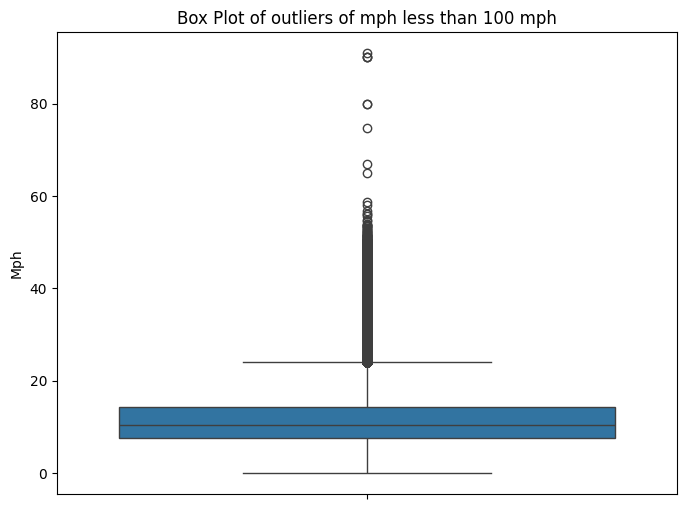

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=taxi_data_modified[taxi_data_modified.mph <= 100]['mph']) 
plt.title('Box Plot of outliers of mph less than 100 mph')
plt.ylabel('Mph')
plt.show()

100 mph is very crazy, anyway the max speed limit in New York State is 65 mph. 

So, it's also reasonable to not have a ride with an average mph that is over 80 mph, to be large

In [53]:
outliers_mph_2 = taxi_data_modified[taxi_data_modified.mph >= 80]

outliers_mph_2

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
3708,15,20,140,5,20,4,QN98,4,QN98,-73.782578,...,-73.782578,40.644093,1,1,1.20,52.0,6.20,0.01,120.00,43.33
7687,21,20,138,3,20,4,QN98,4,QN98,-73.790321,...,-73.790321,40.643642,1,1,1.40,80.0,7.20,0.01,140.00,57.14
8070,18,20,137,2,16,1,MN31,1,MN31,-73.947899,...,-73.948799,40.769821,2,1,0.07,20.0,4.34,0.00,inf,285.71
11390,14,22,150,1,7,1,MN23,1,MN23,-74.008865,...,-74.008850,40.730782,1,1,1.40,2.5,6.57,0.00,inf,1.79
13145,4,22,149,7,21,4,QN98,4,QN98,-73.790070,...,-73.790070,40.646900,1,2,15.20,43.3,41.71,0.01,1520.00,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482002,16,22,152,3,4,1,MN13,1,MN13,-74.005722,...,-74.005722,40.745079,1,1,1.20,7.0,7.04,0.00,inf,5.83
484308,16,19,133,5,10,1,MN22,1,MN22,-73.986565,...,-73.986572,40.733013,1,1,2.10,2.5,9.35,0.00,inf,1.19
485879,7,18,124,3,0,4,QN98,3,BK90,-73.788841,...,-73.940361,40.715801,2,1,15.49,51.0,41.72,0.00,inf,3.29


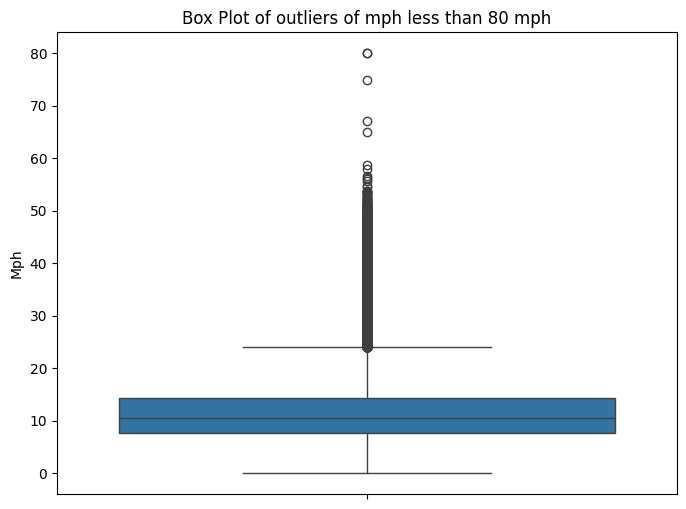

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=taxi_data_modified[taxi_data_modified.mph <=80]['mph']) 
plt.title('Box Plot of outliers of mph less than 80 mph')
plt.ylabel('Mph')
plt.show()

Let's see if those extreme data points are reasonable or not

In [55]:
taxi_data_modified[(taxi_data_modified.mph <= 100) & (taxi_data_modified.mph > 60)]

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
10065,13,19,132,4,870,1,MN13,4,QN98,-74.003922,...,-73.799721,40.645458,2,1,17.95,52.0,56.57,0.24,74.79,2.90
32855,15,19,127,6,26,4,QN54,4,QN54,-73.814468,...,-73.814461,40.698139,1,3,0.90,70.0,5.51,0.01,90.00,77.78
115859,16,20,134,6,54,4,QN98,4,QN98,-73.807541,...,-73.790321,40.644650,2,1,1.34,52.0,7.89,0.02,67.00,38.81
229233,16,19,130,2,30,4,QN98,4,QN98,-73.790176,...,-73.790176,40.646736,1,1,0.90,20.0,6.55,0.01,90.00,22.22
301511,14,18,124,3,45,4,QN98,4,QN98,-73.865227,...,-73.865364,40.770706,1,1,0.80,45.0,5.45,0.01,80.00,56.25
326547,13,22,152,3,81,1,MN19,1,MN19,-73.974915,...,-73.973434,40.757458,1,2,1.30,7.5,7.06,0.02,65.00,5.77
397695,16,18,126,5,26,1,MN17,1,MN17,-73.994934,...,-73.994934,40.749981,1,1,0.80,6.3,6.26,0.01,80.00,7.87
471207,3,19,128,7,49,1,MN24,1,MN24,-73.997841,...,-73.997505,40.721012,1,1,0.90,2.5,6.24,0.01,90.00,2.78
488732,15,20,135,7,777,3,BK61,3,BK91,-73.953430,...,-73.936836,40.656223,1,1,20.00,52.0,60.77,0.22,90.91,2.60


The majority is composed by very short ride but we can't say much more.

It's either not reasonable to have a mph equals or less than 0.

In [56]:
mph_0 = taxi_data_modified[taxi_data_modified.mph == 0]

mph_0

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
234,22,19,127,6,146,4,QN72,4,QN72,-73.911804,...,-73.911804,40.783081,1,1,0.0,38.8,4.96,0.04,0.0,inf
1689,21,19,129,1,3834,4,QN98,1,MN14,-73.790512,...,-73.981155,40.776756,1,1,0.0,52.0,41.84,1.06,0.0,inf
3237,23,21,147,5,48,1,MN36,1,MN36,-73.942055,...,-73.942062,40.835388,2,1,0.0,52.0,3.98,0.01,0.0,inf
3620,10,18,126,5,788,1,MN17,1,MN13,-73.975471,...,-73.985603,40.741329,2,1,0.0,9.0,10.88,0.22,0.0,inf
3807,17,20,136,1,35,1,MN12,1,MN12,-73.980057,...,-73.979958,40.783901,1,1,0.0,2.5,4.35,0.01,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482452,8,21,144,2,44,4,QN98,4,QN98,-73.782578,...,-73.782578,40.644150,2,3,0.0,52.0,3.44,0.01,0.0,inf
485339,13,20,135,7,3178,1,MN13,4,QN98,-73.999664,...,-73.782936,40.648617,2,1,0.0,52.0,34.78,0.88,0.0,inf
488994,6,20,140,5,713,1,MN22,1,MN22,-73.991402,...,-73.991402,40.723927,2,2,0.0,24.0,10.13,0.20,0.0,inf


In [57]:
taxi_data_modified[taxi_data_modified.mph < 0]

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,


## Fare amount

As we've seen in the blox plot of his distribution, it seems that there are some outliers after the value of 200 and this is quite reasonable

In [58]:
outliers_fare = taxi_data_modified[taxi_data_modified['fare_amount'] >= 200]

outliers_fare

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
40469,16,19,132,4,116,3,BK27,3,BK27,-74.002602,...,-74.002670,40.599148,1,1,0.0,500.0,5.16,0.03,0.0,inf
87626,4,18,126,5,24,1,MN20,1,MN20,-73.978760,...,-73.978752,40.751743,2,1,0.0,228.0,3.74,0.01,0.0,inf
108233,19,19,131,3,40,4,QN98,4,QN98,-73.864021,...,-73.863861,40.769894,2,2,0.0,200.0,4.40,0.01,0.0,inf
184767,22,19,129,1,8,1,MN23,1,MN23,-74.003380,...,-74.003380,40.739052,2,1,0.0,350.0,3.58,0.00,NaN,inf
284251,17,18,125,4,41,4,QN98,4,QN98,-73.792747,...,-73.793068,40.662930,2,3,0.0,225.0,4.41,0.01,0.0,inf


In all these values the fares are huge and lenght time very short while trip distance even 0, this is not making any sense at all!

In [59]:
fare_0 = taxi_data_modified[taxi_data_modified['fare_amount'] == 0]

fare_0

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,


In [60]:
taxi_data_modified[taxi_data_modified['fare_amount'] < 0]

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,


# Exploration of categorical columns

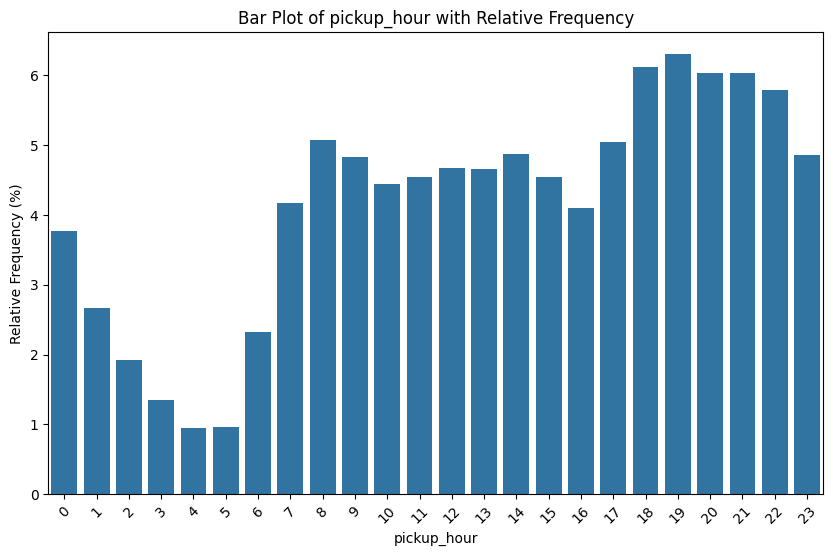

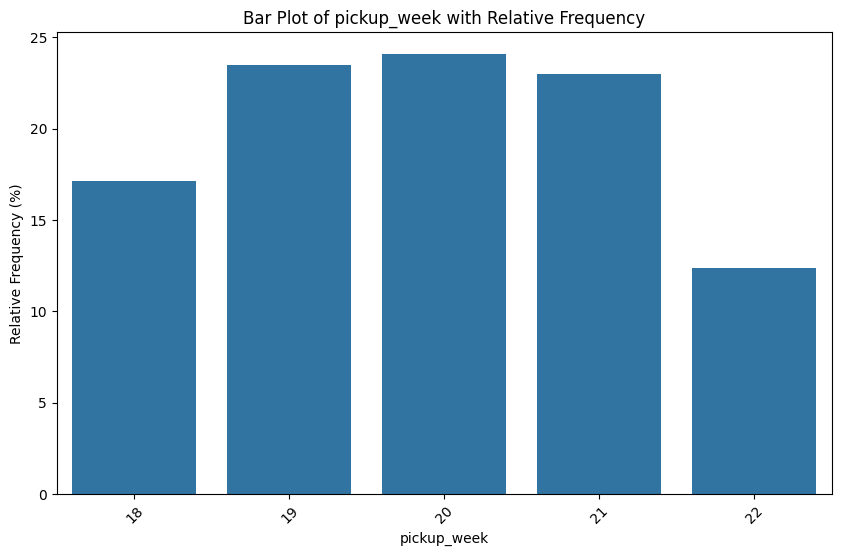

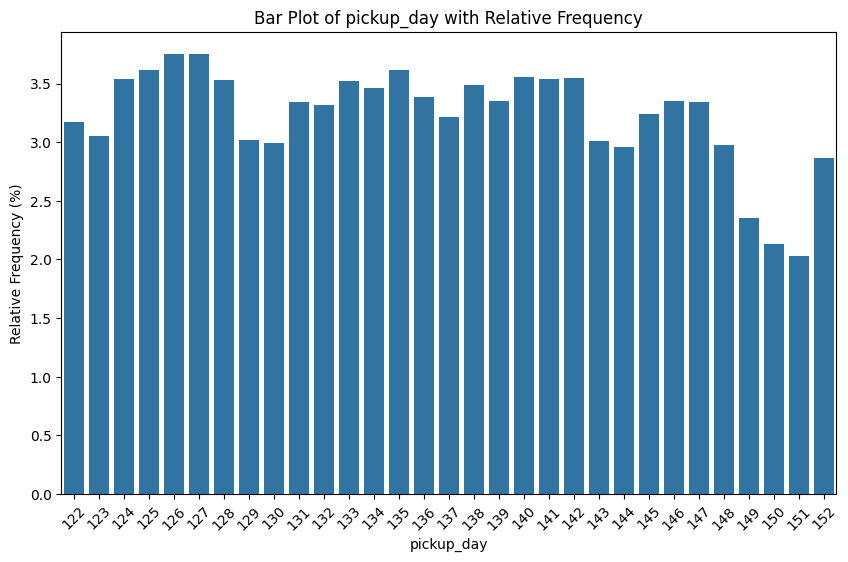

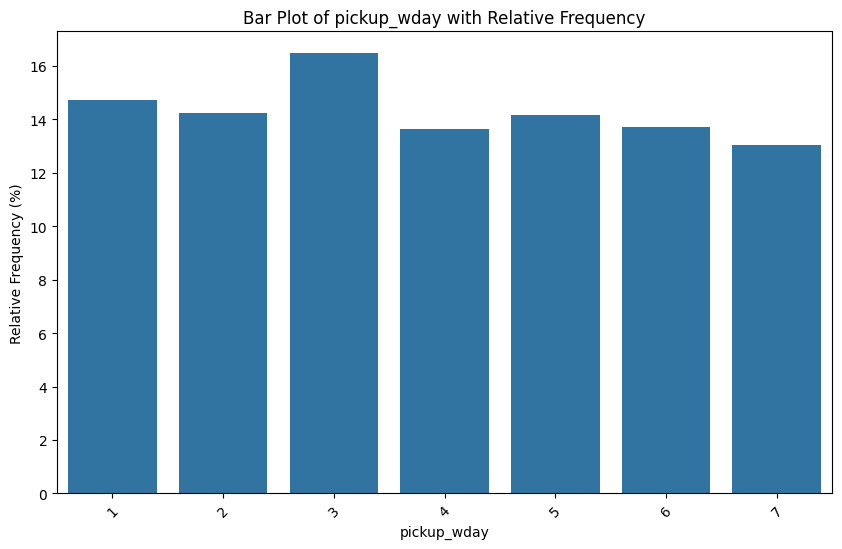

Values with relative frequency less than 0.5% in pickup_BoroCode:
pickup_BoroCode
2    0.035620
5    0.004885
Name: proportion, dtype: float64


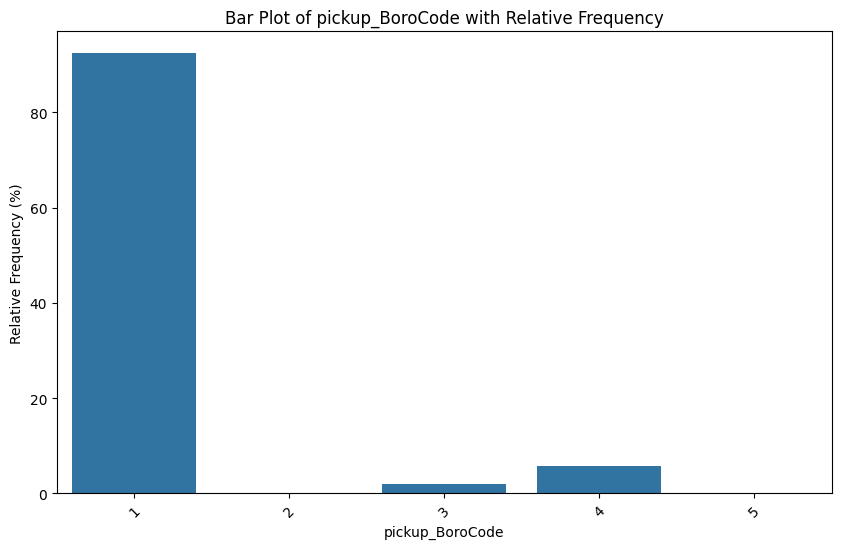

Values with relative frequency less than 0.5% in pickup_NTACode:
pickup_NTACode
BK73    0.378594
MN50    0.353761
BK38    0.350504
MN11    0.288627
MN34    0.228174
          ...   
BX28    0.000204
BK29    0.000204
QN08    0.000204
QN06    0.000204
BX37    0.000204
Name: proportion, Length: 137, dtype: float64


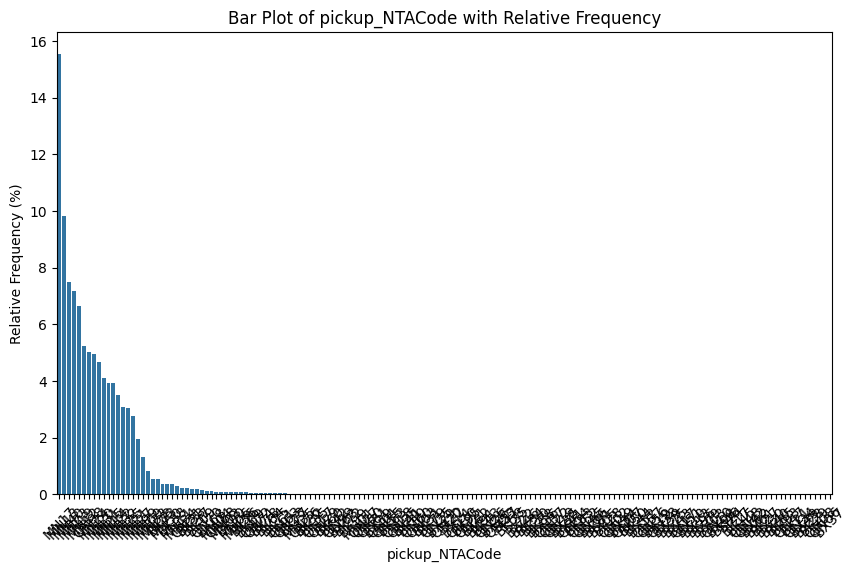

Values with relative frequency less than 0.5% in dropoff_BoroCode:
dropoff_BoroCode
2    0.410754
5    0.024018
Name: proportion, dtype: float64


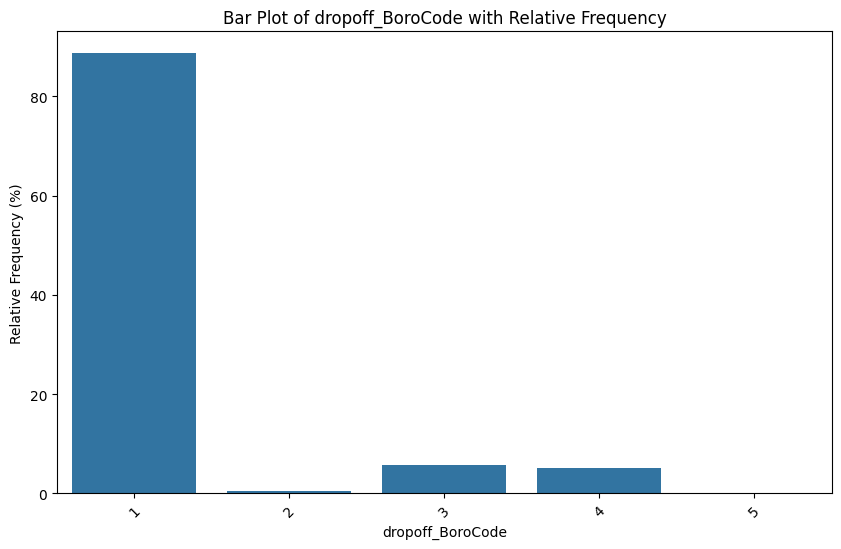

Values with relative frequency less than 0.5% in dropoff_NTACode:
dropoff_NTACode
MN50    0.493393
QN70    0.448206
MN36    0.395081
BK76    0.363124
BK33    0.362514
          ...   
SI54    0.001018
SI12    0.000814
SI48    0.000814
SI08    0.000611
SI11    0.000407
Name: proportion, Length: 163, dtype: float64


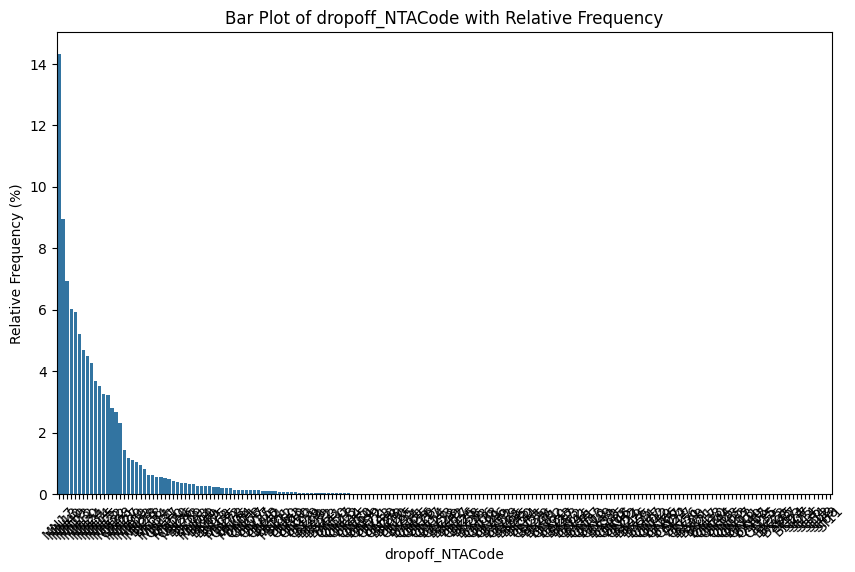

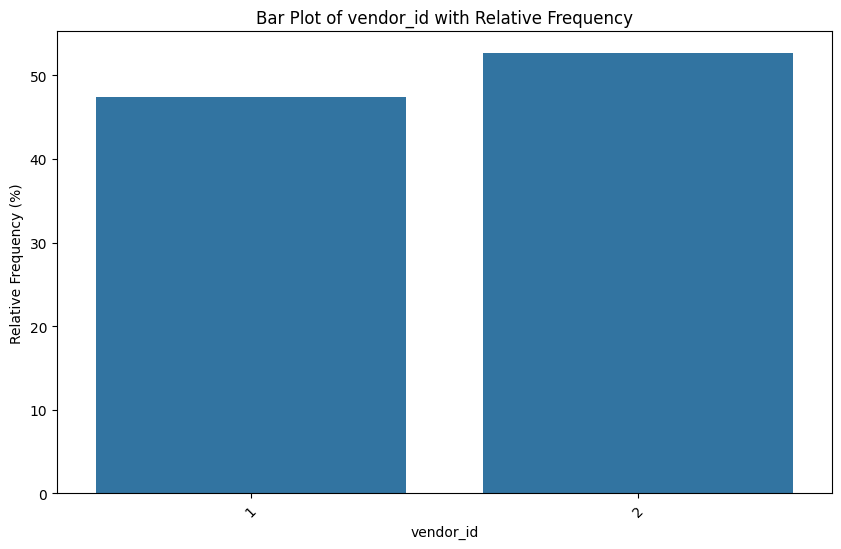

In [61]:
for col in categorical_columns:
    if col not in ['pickup_month', 'pair']:
        plt.figure(figsize=(10, 6))
        # Calculate relative frequency
        relative_freq = taxi_data[col].value_counts(normalize=True) * 100
        # Plot
        sns.barplot(x=relative_freq.index, y=relative_freq.values)
        plt.title(f"Bar Plot of {col} with Relative Frequency")
        plt.xlabel(col)
        plt.ylabel("Relative Frequency (%)")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        
        # Identify values with relative frequency less than 0.5%
        low_freq_values = relative_freq[relative_freq < 0.5]
        if not low_freq_values.empty:
            print(f"Values with relative frequency less than 0.5% in {col}:")
            print(low_freq_values)

        plt.show()

Maybe can be useful to bring rare values together in a category such as: "Others" or "Other", but it depends on what we want to do on the data.

Anyway, looking at the plots, the data seems correct, but we can go deeper on NTAcodes.

# NTACode

We have found a dataframe with all the NTACode so we can check if anything is correct.

We just skip the data collecting here, and let's take direclty the list of NTACodes.

source: https://data.cityofnewyork.us/City-Government/NTA-map/d3qk-pfyz

In [62]:
NTACode_list = ['BK43',
 'BK75',
 'BX40',
 'BK88',
 'BK96',
 'QN52',
 'QN53',
 'BK44',
 'QN48',
 'BX44',
 'QN51',
 'QN27',
 'BK81',
 'BK85',
 'BK41',
 'BX46',
 'BK95',
 'QN33',
 'BK91',
 'BK46',
 'BK93',
 'BX35',
 'QN29',
 'MN22',
 'QN44',
 'BX33',
 'MN32',
 'MN40',
 'BK40',
 'QN12',
 'BX98',
 'BX27',
 'QN28',
 'BK27',
 'SI36',
 'BK42',
 'BX34',
 'BK79',
 'MN09',
 'BX55',
 'BX31',
 'QN06',
 'QN07',
 'BK58',
 'BK82',
 'BX30',
 'QN02',
 'BK50',
 'BX43',
 'MN06',
 'MN23',
 'SI14',
 'QN34',
 'MN27',
 'BX10',
 'BX62',
 'QN71',
 'QN70',
 'MN50',
 'BK30',
 'BK28',
 'SI22',
 'SI35',
 'SI07',
 'BX36',
 'QN46',
 'BK61',
 'BX14',
 'QN26',
 'BK83',
 'QN37',
 'QN38',
 'BK73',
 'MN28',
 'BK76',
 'BX29',
 'BK34',
 'MN01',
 'BK25',
 'MN35',
 'QN72',
 'BX39',
 'BK23',
 'MN03',
 'QN68',
 'SI45',
 'BX28',
 'BX13',
 'BK31',
 'BK32',
 'BK68',
 'MN24',
 'MN25',
 'MN15',
 'BK64',
 'QN76',
 'QN01',
 'QN56',
 'BK45',
 'BK19',
 'BK29',
 'BX08',
 'BK17',
 'BX59',
 'SI25',
 'SI08',
 'BK37',
 'SI37',
 'QN41',
 'QN43',
 'BK35',
 'BK90',
 'QN20',
 'MN33',
 'QN18',
 'MN34',
 'BK77',
 'BK78',
 'MN11',
 'QN23',
 'MN17',
 'QN19',
 'SI11',
 'SI99',
 'SI05',
 'SI24',
 'QN55',
 'QN57',
 'BK60',
 'MN20',
 'SI12',
 'BK63',
 'BK09',
 'SI28',
 'QN31',
 'BX01',
 'BX37',
 'BX49',
 'BX41',
 'QN47',
 'QN49',
 'MN19',
 'MN31',
 'QN50',
 'QN63',
 'QN08',
 'QN66',
 'MN04',
 'QN61',
 'QN54',
 'QN35',
 'QN60',
 'QN21',
 'QN30',
 'MN12',
 'MN14',
 'BX07',
 'QN42',
 'QN45',
 'SI01',
 'SI54',
 'BK21',
 'QN25',
 'BX52',
 'BK26',
 'BX17',
 'BX22',
 'BX05',
 'BX06',
 'BX03',
 'QN10',
 'BX75',
 'SI32',
 'SI48',
 'QN15',
 'BX09',
 'BX99',
 'BK33',
 'MN99',
 'QN05',
 'QN22',
 'QN62',
 'MN13',
 'MN21',
 'BK38',
 'BK69',
 'BK72',
 'BK99',
 'MN36',
 'BX26',
 'BX63',
 'QN17',
 'QN99',
 'QN03',
 'QN98']

In [63]:
taxi_data[['pickup_NTACode','dropoff_NTACode']].isin(NTACode_list).all()

pickup_NTACode     True
dropoff_NTACode    True
dtype: bool

So far so good!

Let's go deeper!

In [64]:
boro_nta_dict = {3: ['BK43', 'BK75', 'BK88', 'BK96', 'BK44', 'BK81', 'BK85', 'BK41', 'BK95', 'BK91', 'BK46', 'BK93', 'BK40', 'BK27', 'BK42', 'BK79', 'BK58', 'BK82', 'BK50', 'BK30', 'BK28', 'BK61', 'BK83', 'BK73', 'BK76', 'BK34', 'BK25', 'BK23', 'BK31', 'BK32', 'BK68', 'BK64', 'BK45', 'BK19', 'BK29', 'BK17', 'BK37', 'BK35', 'BK90', 'BK77', 'BK78', 'BK60', 'BK63', 'BK09', 'BK21', 'BK26', 'BK33', 'BK38', 'BK69', 'BK72', 'BK99'], 2: ['BX40', 'BX44', 'BX46', 'BX35', 'BX33', 'BX98', 'BX27', 'BX34', 'BX55', 'BX31', 'BX30', 'BX43', 'BX10', 'BX62', 'BX36', 'BX14', 'BX29', 'BX39', 'BX28', 'BX13', 'BX08', 'BX59', 'BX01', 'BX37', 'BX49', 'BX41', 'BX07', 'BX52', 'BX17', 'BX22', 'BX05', 'BX06', 'BX03', 'BX75', 'BX09', 'BX99', 'BX26', 'BX63'], 4: ['QN52', 'QN53', 'QN48', 'QN51', 'QN27', 'QN33', 'QN29', 'QN44', 'QN12', 'QN28', 'QN06', 'QN07', 'QN02', 'QN34', 'QN71', 'QN70', 'QN46', 'QN26', 'QN37', 'QN38', 'QN72', 'QN68', 'QN76', 'QN01', 'QN56', 'QN41', 'QN43', 'QN20', 'QN18', 'QN23', 'QN19', 'QN55', 'QN57', 'QN31', 'QN47', 'QN49', 'QN50', 'QN63', 'QN08', 'QN66', 'QN61', 'QN54', 'QN35', 'QN60', 'QN21', 'QN30', 'QN42', 'QN45', 'QN25', 'QN10', 'QN15', 'QN05', 'QN22', 'QN62', 'QN17', 'QN99', 'QN03', 'QN98'], 1: ['MN22', 'MN32', 'MN40', 'MN09', 'MN06', 'MN23', 'MN27', 'MN50', 'MN28', 'MN01', 'MN35', 'MN03', 'MN24', 'MN25', 'MN15', 'MN33', 'MN34', 'MN11', 'MN17', 'MN20', 'MN19', 'MN31', 'MN04', 'MN12', 'MN14', 'MN99', 'MN13', 'MN21', 'MN36'], 5: ['SI36', 'SI14', 'SI22', 'SI35', 'SI07', 'SI45', 'SI25', 'SI08', 'SI37', 'SI11', 'SI99', 'SI05', 'SI24', 'SI12', 'SI28', 'SI01', 'SI54', 'SI32', 'SI48']}

In [65]:
# It might takes a while to run this script (30 sec)
errors = []

for index, row in taxi_data.iterrows():
    pickup_boro_code = row['pickup_BoroCode']
    pickup_nta_code = row['pickup_NTACode']
    dropoff_boro_code = row['dropoff_BoroCode']
    dropoff_nta_code = row['dropoff_NTACode']
    
    if pickup_nta_code not in boro_nta_dict[pickup_boro_code]:
        errors.append(f"Pickup NTACode {pickup_nta_code} does not correspond to the correct BoroCode {pickup_boro_code}")
    
    if dropoff_nta_code not in boro_nta_dict[dropoff_boro_code]:
        errors.append(f"Dropoff NTACode {dropoff_nta_code} does not correspond to the correct BoroCode {dropoff_boro_code}")

# Check if there are any errors
if not errors:
    print("All NTACodes correspond to the correct BoroCodes")
else:
    for error in errors:
        print(error)


All NTACodes correspond to the correct BoroCodes


# Outliers

In [66]:
outliers_sup = pd.concat([outliers_distance_2,outliers_fare,outliers_mph_2,outliers_time_2, outliers_passenger]).drop_duplicates()

outliers_sup

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
28050,1,19,129,1,1809,1,MN24,1,MN32,-74.004509,...,-73.948387,40.782665,1,2,284000.00,27.5,710021.59,0.50,568000.00,0.00
94053,18,21,142,7,602,1,MN13,1,MN17,-73.993378,...,-73.988358,40.745796,1,2,50.00,5.0,135.02,0.17,294.12,0.10
360114,8,19,127,6,827,1,MN15,1,MN15,-74.000748,...,-73.992355,40.755054,1,1,601.00,9.5,1513.77,0.23,2613.04,0.02
369504,17,20,139,4,3987,4,QN98,1,MN23,-73.783264,...,-74.004875,40.729607,1,2,188.80,52.0,515.87,1.11,170.09,0.28
378486,4,22,149,7,1199,1,MN17,3,BK75,-73.990784,...,-73.959198,40.688946,1,1,12000003.90,20.5,30000025.24,0.33,36363648.18,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486547,17,20,136,1,24260,1,MN22,1,MN23,-73.984955,...,-73.996468,40.725475,2,2,0.75,5.5,248.48,6.74,0.11,7.33
488455,5,21,146,4,65369,1,MN09,1,MN12,-73.964401,...,-73.973801,40.792042,2,1,1.19,6.0,660.17,18.16,0.07,5.04
488975,21,19,130,2,80361,1,MN20,1,MN14,-73.979012,...,-73.981560,40.771118,2,1,2.06,13.5,812.26,22.32,0.09,6.55


In [67]:
outliers_inf = pd.concat([distance_0_different_NTA,fare_0,mph_0,time_0,passenger_0]).drop_duplicates()

outliers_inf # the 0s can also be interpreted as missing values

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
1689,21,19,129,1,3834,4,QN98,1,MN14,-73.790512,...,-73.981155,40.776756,1,1,0.0,52.0,41.84,1.06,0.0,inf
3620,10,18,126,5,788,1,MN17,1,MN13,-73.975471,...,-73.985603,40.741329,2,1,0.0,9.0,10.88,0.22,0.0,inf
4570,21,20,135,7,511,1,MN17,1,MN24,-73.991524,...,-74.007195,40.727242,2,1,0.0,6.5,8.61,0.14,0.0,inf
4676,15,19,130,2,684,1,MN31,1,MN19,-73.956772,...,-73.972000,40.745579,2,1,0.0,8.0,9.84,0.19,0.0,inf
13222,21,19,131,3,485,1,MN22,1,MN27,-73.985184,...,-73.987244,40.722385,1,2,0.0,6.5,8.35,0.13,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385136,20,22,152,3,10,1,MN32,1,MN32,-73.950829,...,-73.950768,40.773514,1,0,8.2,33.0,NaN,NaN,NaN,NaN
394236,0,22,148,6,2,4,QN31,4,QN31,-73.957901,...,-73.957901,40.742802,1,0,3.4,20.0,NaN,NaN,NaN,NaN
416411,0,20,135,7,4,4,QN63,4,QN63,-73.904610,...,-73.904602,40.753456,2,0,0.0,22.0,NaN,NaN,NaN,NaN


In [68]:
outliers_total = pd.concat([outliers_sup,outliers_inf]).drop_duplicates()

outliers_total

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,...,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,fare_amount_calculated,duration_hours,mph,fare_per_mile
index,,,,,,,,,,,,,,,,,,,,,
28050,1,19,129,1,1809,1,MN24,1,MN32,-74.004509,...,-73.948387,40.782665,1,2,284000.0,27.5,710021.59,0.50,568000.00,0.00
94053,18,21,142,7,602,1,MN13,1,MN17,-73.993378,...,-73.988358,40.745796,1,2,50.0,5.0,135.02,0.17,294.12,0.10
360114,8,19,127,6,827,1,MN15,1,MN15,-74.000748,...,-73.992355,40.755054,1,1,601.0,9.5,1513.77,0.23,2613.04,0.02
369504,17,20,139,4,3987,4,QN98,1,MN23,-73.783264,...,-74.004875,40.729607,1,2,188.8,52.0,515.87,1.11,170.09,0.28
378486,4,22,149,7,1199,1,MN17,3,BK75,-73.990784,...,-73.959198,40.688946,1,1,12000003.9,20.5,30000025.24,0.33,36363648.18,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385136,20,22,152,3,10,1,MN32,1,MN32,-73.950829,...,-73.950768,40.773514,1,0,8.2,33.0,NaN,NaN,NaN,NaN
394236,0,22,148,6,2,4,QN31,4,QN31,-73.957901,...,-73.957901,40.742802,1,0,3.4,20.0,NaN,NaN,NaN,NaN
416411,0,20,135,7,4,4,QN63,4,QN63,-73.904610,...,-73.904602,40.753456,2,0,0.0,22.0,NaN,NaN,NaN,NaN


Ok, now we have explored all variables and we are aware of observation with high_values in some variables.

It's generally advisable to maintain the integrity of the original data and address any issues using stability concepts or models that can handle heterogeneity effectively. Rather than directly modifying the data, consider utilizing techniques that account for variability and differences in the dataset. This approach ensures that the original information is preserved while addressing any challenges or inconsistencies present in the data.

## Tidy dataset

In [69]:
taxi_data

,pickup_hour,pickup_week,pickup_day,pickup_wday,length_time,pickup_BoroCode,pickup_NTACode,dropoff_BoroCode,dropoff_NTACode,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount
index,,,,,,,,,,,,,,,,,
1,18,19,132,4,520,1,MN15,1,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0
2,7,21,146,4,672,1,MN24,1,MN17,-74.009789,40.712395,-73.983223,40.760330,1,1,3.70,12.5
3,18,19,127,6,824,1,MN21,1,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0
4,2,22,148,6,637,1,MN17,1,MN33,-73.978989,40.755726,-73.951187,40.789021,1,1,3.40,12.0
5,17,21,141,6,2491,1,MN17,4,QN98,-73.985313,40.761181,-73.865250,40.770699,2,1,11.74,37.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491288,23,21,141,6,193,1,MN14,1,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5
491289,22,22,151,2,945,1,MN40,1,MN22,-73.956261,40.787140,-73.978577,40.728729,1,1,5.30,18.0
491290,19,19,132,4,764,1,MN20,1,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0


In [70]:
clean_tidy_dataset = taxi_data.to_csv('tidy_dataset_Red-Hot-Data-Peppers.csv', index=False)